In [17]:
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
import statistics

In [4]:
df = pd.read_csv('../data/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
X = df[['PetalLengthCm','PetalWidthCm']].to_numpy()

print(df['Species'].unique())

Label_Dict = {'Iris-setosa': 0 , 'Iris-versicolor' : 1 ,'Iris-virginica' : 2}
df['ClassLabel'] = df['Species'].map(Label_Dict)

y = df['ClassLabel'].values

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


#### Shuffle Dataset

In [6]:
import random
rnd=np.random.RandomState(123)
shuffled_indices = rnd.permutation(df.shape[0])

X_shuffled, y_shuffled = X[shuffled_indices],y[shuffled_indices]


### Split dataset into test and train

In [7]:
split_train= int(X.shape[0]*0.7)
X_train, y_train = X_shuffled[:split_train], y_shuffled[:split_train]
X_test, y_test = X_shuffled[split_train:], y_shuffled[split_train:]

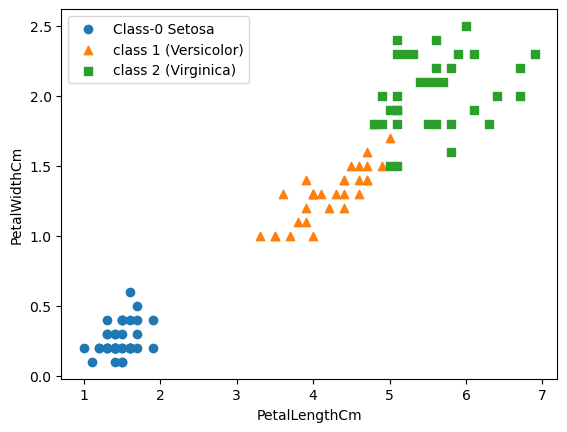

In [8]:
plt.scatter(X_train[y_train==0,0],
            X_train[y_train==0,1],
           marker= 'o',
           label = 'Class-0 Setosa ')

plt.scatter(X_train[y_train == 1, 0],
            X_train[y_train == 1, 1],
            marker='^',
            label='class 1 (Versicolor)')

plt.scatter(X_train[y_train == 2, 0],
            X_train[y_train == 2, 1],
            marker='s',
            label='class 2 (Virginica)')

plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()    
plt.show()

### 1 - NN from scratch

In [9]:
y_train[18]

1

In [33]:
def distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def k1_NN_classifier(x1,X_train):
    d=np.inf
    for i in range(X_train.shape[0]):
        if (distance(x1,X_train[i]) < d):
            d = distance(x1,X_train[i])
            index = i 
    y_hat = y_train[index]
    return y_hat, index 

y_hat,NN=k1_NN(X_test[0],X_train)

print(f'The nearest neighbour is {NN}th data point and its label is {y_hat}')

The nearest neighbour is 18th data point and its label is 1


### k-NN from scratch 

np.delete(X_train, (0), axis=0).shape
Reusablle code from 1NN

In [78]:
def k_NN_classifier(x1,X_train, N):
    index_ls = []
#     D = X_train.copy()
    j=0
    while (j<N):
        
        d=np.inf
        for i in range(X_train.shape[0]):
            if(i in index_ls):
                continue
            if (distance(x1,X_train[i]) < d):
                d = distance(x1,X_train[i])
                index = i 
        index_ls.append(index)
        
        j+=1
#     y_hat = statistics.mode(y_train[index_ls])
    return index_ls
# , y_hat

In [47]:
# def score(X,y):
    

In [85]:
Y_pred_ls=[]
for i in range(X_test.shape[0]):
    labels=y_train[k_NN_index(X_test[i],X_train,3)]
    Y_pred =  statistics.mode(labels)
    Y_pred_ls.append(Y_pred)

### Using Argsort 